In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.drop(['animal name'],axis=1,inplace=True)

In [ ]:
data.head()

In [7]:
x=data.drop(['type'],axis=1).values
y=data['type'].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [11]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred=model.predict(x_test)
y_pred

array([2, 3, 2, 1, 1, 6, 1, 2, 4, 1, 7, 6, 1, 4, 6, 1, 2, 4, 2, 4, 1],
      dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8095238095238095

# KNN using the gridsearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
model=KNeighborsClassifier()
gsv=GridSearchCV(model,param_grid=param_grid)

In [23]:
gsv.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [33]:
gsv.best_score_


0.975

In [25]:
gsv.best_params_

{'n_neighbors': 1}

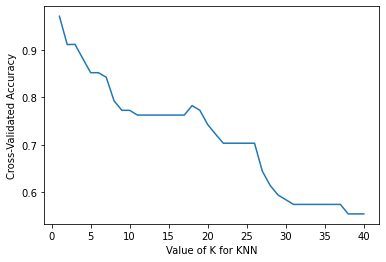

In [31]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



In [ ]:
## for k value 0 to 5 accuracy is higher

In [32]:
model1=KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train,y_train)
predict=model1.predict(x_test)
accuracy=accuracy_score(y_test,predict)
accuracy

0.9523809523809523